# I may be poor but I ain't give up this damn book

## An analysis about people reading habits

### Dataset source
Kaggle.com - "Reading habit Dataset" by Overfitted

#### Aim of this analysis

Discover peculiar information and insights regarding people's reading habits using data analysis. In particular, we'll try to answer these questions:

* Is there a difference between sex? Do females read more than males or viceversa?
* What age (range) reads the most? And why (optional)
* Among which category audiobooks are popular?
* Are books a luxury among those who earn the minimum?
* Among the most avid readers (50+ books) which percentage actually buy books?

----

#### Importing important stuff

In [400]:
import numpy as np
import pandas as pd
import math
import unicodedata
from urllib.request import urlretrieve 
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

import seaborn as sns
sns.set_style('darkgrid')



#### Importing our dataset

In [401]:
readers_df = pd.read_csv(r'\Users\loren\Downloads\dataset.csv')

In [402]:
readers_df

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN,NaN,NaN,Yes,Yes
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,Yes
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No


In [403]:
readers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  2832 non-null   int64 
 1   Sex                                                  2832 non-null   object
 2   Race                                                 2832 non-null   object
 3   Marital status?                                      2832 non-null   object
 4   Education                                            2832 non-null   object
 5   Employement                                          2832 non-null   object
 6   Incomes                                              2832 non-null   object
 7   How many books did you read during last 12months?    2832 non-null   int64 
 8   Read any printed books during last 12months?         2442 non-null   object
 9

## Data preparation & cleaning

#### Dropping columns that we're not using

In [404]:
df = readers_df.drop(readers_df.columns[[3, 8, 10, 12, 13 ]],axis = 1)

#### Renaming columns better

In [405]:
df = df.rename(columns={"How many books did you read during last 12months?": "books_last_12mo", 
                       "Read any audiobooks during last 12months?": "audiobook_last_12mo", 
                       "Last book you read, you…": "purchased_borrowed",
                       "Age": "age",
                       "Sex": "sex",
                       "Race": "race",
                        "Education": "education",
                       "Employement": "employment",
                       "Incomes" : "incomes"})

#### Fixing "Incomes" formatting

In [406]:
pd.set_option('display.html.use_mathjax', False)

In [407]:
df

,age,sex,race,education,employment,incomes,books_last_12mo,audiobook_last_12mo,purchased_borrowed
0,66,Male,Refused,College graduate,Retired,"$20,000 to under $30,000",97,No,Purchased the book
1,46,Male,Native American/American Indian,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Purchased the book
2,32,Male,Mixed race,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Borrowed the book from a friend or family member
3,27,Male,Mixed race,High school graduate,Employed full-time,"$40,000 to under $50,000",97,No,Borrowed the book from a library
4,16,Female,Mixed race,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Purchased the book
...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN
2828,17,Male,White,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN
2829,17,Female,White,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN
2830,16,Male,White,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN


#### Checking out NaN values

In [408]:
df

,age,sex,race,education,employment,incomes,books_last_12mo,audiobook_last_12mo,purchased_borrowed
0,66,Male,Refused,College graduate,Retired,"$20,000 to under $30,000",97,No,Purchased the book
1,46,Male,Native American/American Indian,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Purchased the book
2,32,Male,Mixed race,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Borrowed the book from a friend or family member
3,27,Male,Mixed race,High school graduate,Employed full-time,"$40,000 to under $50,000",97,No,Borrowed the book from a library
4,16,Female,Mixed race,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Purchased the book
...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,High school graduate,Employed part-time,"$75,000 to under $100,000",0,NaN,NaN
2828,17,Male,White,High school incomplete,Employed part-time,"$30,000 to under $40,000",0,NaN,NaN
2829,17,Female,White,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN
2830,16,Male,White,High school graduate,Not employed for pay,"9$100,000 to under $150,000",0,NaN,NaN


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  2832 non-null   int64 
 1   sex                  2832 non-null   object
 2   race                 2832 non-null   object
 3   education            2832 non-null   object
 4   employment           2832 non-null   object
 5   incomes              2832 non-null   object
 6   books_last_12mo      2832 non-null   int64 
 7   audiobook_last_12mo  2442 non-null   object
 8   purchased_borrowed   2442 non-null   object
dtypes: int64(2), object(7)
memory usage: 199.2+ KB


Look like we have some NAN values for <b>audiobook_last_12mo</b> and <b>purchased_borrowed</b>. Let's remove them.

In [410]:
df = df.dropna()
df

,age,sex,race,education,employment,incomes,books_last_12mo,audiobook_last_12mo,purchased_borrowed
0,66,Male,Refused,College graduate,Retired,"$20,000 to under $30,000",97,No,Purchased the book
1,46,Male,Native American/American Indian,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Purchased the book
2,32,Male,Mixed race,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Borrowed the book from a friend or family member
3,27,Male,Mixed race,High school graduate,Employed full-time,"$40,000 to under $50,000",97,No,Borrowed the book from a library
4,16,Female,Mixed race,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Purchased the book
...,...,...,...,...,...,...,...,...,...
2437,16,Female,White,High school incomplete,Not employed for pay,"$30,000 to under $40,000",1,No,Purchased the book
2438,16,Female,White,High school incomplete,Not employed for pay,"Less than $10,000",1,No,Borrowed the book from a library
2439,16,Male,White,High school incomplete,Not employed for pay,"9$100,000 to under $150,000",1,No,Got the book some other way
2440,16,Female,White,High school incomplete,Employed part-time,"9$100,000 to under $150,000",1,No,Borrowed the book from a friend or family member


There's an incorrect income value for some rows: <code>9$100,000 to under $150,000</code> Let's gonna edit this.

In [411]:
df = df.replace('9$100,000 to under $150,000', '$100,000 to under $150,000')

In [412]:
df

,age,sex,race,education,employment,incomes,books_last_12mo,audiobook_last_12mo,purchased_borrowed
0,66,Male,Refused,College graduate,Retired,"$20,000 to under $30,000",97,No,Purchased the book
1,46,Male,Native American/American Indian,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Purchased the book
2,32,Male,Mixed race,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Borrowed the book from a friend or family member
3,27,Male,Mixed race,High school graduate,Employed full-time,"$40,000 to under $50,000",97,No,Borrowed the book from a library
4,16,Female,Mixed race,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Purchased the book
...,...,...,...,...,...,...,...,...,...
2437,16,Female,White,High school incomplete,Not employed for pay,"$30,000 to under $40,000",1,No,Purchased the book
2438,16,Female,White,High school incomplete,Not employed for pay,"Less than $10,000",1,No,Borrowed the book from a library
2439,16,Male,White,High school incomplete,Not employed for pay,"$100,000 to under $150,000",1,No,Got the book some other way
2440,16,Female,White,High school incomplete,Employed part-time,"$100,000 to under $150,000",1,No,Borrowed the book from a friend or family member


In [413]:
df.incomes.unique()

array(['$20,000 to under $30,000', 'Less than $10,000',
       '$40,000 to under $50,000', '$10,000 to under $20,000',
       '$50,000 to under $75,000', '$100,000 to under $150,000',
       '$75,000 to under $100,000', '$30,000 to under $40,000', 'Refused'],
      dtype=object)

Fixed.

#### Let's gonna better format some values.

In [414]:
df.employment.unique()

array(['Retired', 'Employed full-time', 'Employed part-time',
       'Have own business/self-employed', 'Student', 'Other',
       'Not employed for pay', 'Disabled'], dtype=object)

In [415]:
df = df.replace('Employed full-time', 'FT')
df = df.replace('Employed part-time', 'PT')
df = df.replace('Not employed for pay', 'NotEmpl')
df = df.replace('Have own business/self-employed', 'SelfEmpl')

In [416]:
df.purchased_borrowed.unique()

array(['Purchased the book',
       'Borrowed the book from a friend or family member',
       'Borrowed the book from a library', 'Got the book some other way',
       '8', '9'], dtype=object)

In [417]:
df = df.replace('Purchased the book', 'Purchased')
df = df.replace(['Borrowed the book from a friend or family member', 'Borrowed the book from a library'], 'Borrowed')
df = df.replace('Got the book some other way', 'Other')

Looks like we even have some incorrect values ​​here (8, 9). For the sake of accuracy, we're gonna remove these rows.

In [418]:
df = df[df["purchased_borrowed"].str.contains("8") == False]
df = df[df["purchased_borrowed"].str.contains("9") == False]

In [419]:
df.purchased_borrowed.unique()

array(['Purchased', 'Borrowed', 'Other'], dtype=object)

#### Transform "incomes" from objects to int

Since incomes' values are range of numbers, let's gonna edit them: Python needs to know that those are numeric values.
We're gonna edit them in this way:

<code>
* Refused --> 0
* Less than $10,000 --> 1
* $10,000 to under $20,000 --> 2
* $20,000 to under $30,000 --> 3
* $30,000 to under $40,000 --> 4
* $40,000 to under $50,000 --> 5
* $50,000 to under $75,000 --> 6
* $75,000 to under $100,000 --> 7 
* $100,000 to under $150,000 --> 8 </code>

In [420]:
df = df.replace('Refused', '0')
df = df.replace('Less than $10,000','1')
df = df.replace('$10,000 to under $20,000','2')
df = df.replace('$20,000 to under $30,000','3')
df = df.replace('$30,000 to under $40,000','4')
df = df.replace('$40,000 to under $50,000','5')
df = df.replace('$50,000 to under $75,000','6')
df = df.replace('$75,000 to under $100,000','7')
df = df.replace('$100,000 to under $150,000','8')

In [421]:
df["incomes"] = pd.to_numeric(df["incomes"])

In [422]:
df.incomes.unique()

array([3, 1, 5, 2, 6, 8, 7, 4, 0], dtype=int64)

Now that our dataframe is clean, we can go on and do some analysis. One last check:

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2411 entries, 0 to 2441
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  2411 non-null   int64 
 1   sex                  2411 non-null   object
 2   race                 2411 non-null   object
 3   education            2411 non-null   object
 4   employment           2411 non-null   object
 5   incomes              2411 non-null   int64 
 6   books_last_12mo      2411 non-null   int64 
 7   audiobook_last_12mo  2411 non-null   object
 8   purchased_borrowed   2411 non-null   object
dtypes: int64(3), object(6)
memory usage: 188.4+ KB


## Exploratory analysis & visualization

#### Checking out useful info (only for numerical type)

In [424]:
df.describe()

,age,incomes,books_last_12mo
count,2411.000000,2411.000000,2411.000000
mean,46.474077,5.068436,19.453754
std,18.512496,2.719509,24.481169
min,16.000000,0.000000,1.000000
25%,31.000000,3.000000,4.000000
50%,47.000000,6.000000,10.000000
75%,61.000000,8.000000,25.000000
max,93.000000,8.000000,97.000000


#### Studying demographic - Age

In [425]:
df.age.unique()

array([66, 46, 32, 27, 16, 55, 63, 60, 50, 29, 23, 19, 89, 88, 84, 81, 80,
       79, 78, 77, 76, 75, 73, 71, 70, 69, 68, 67, 65, 64, 62, 59, 58, 57,
       56, 54, 53, 52, 45, 44, 42, 41, 40, 38, 37, 36, 35, 34, 33, 30, 28,
       26, 25, 24, 22, 21, 20, 18, 17, 48, 47, 74, 61, 39, 31, 51, 90, 83,
       72, 49, 86, 82, 43, 85, 91, 87, 93], dtype=int64)

Let's visualize this

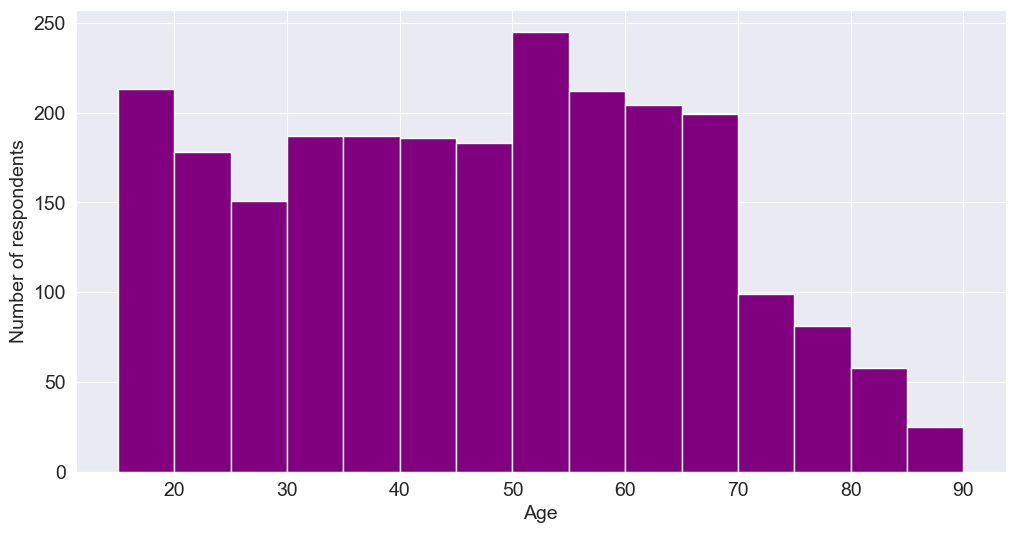

In [426]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(df.age, bins=np.arange(15,95,5), color='purple');

Seems like there's a slightly high peak for 50-55 age range. Overall it looks like that we have a pretty well distributed graph-

#### Studying demographic II - Sex

In [427]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [428]:
sex_counts = df.sex.value_counts()
sex_counts

Female    1320
Male      1091
Name: sex, dtype: int64

Even without a graphical visualization, it seems already that we have just a slightly majority of women.

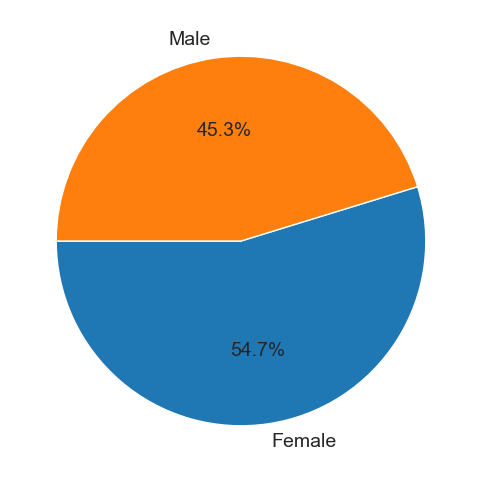

In [429]:
plt.figure(figsize=(12,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=180);

q.e.d.

#### Studying demographic III - Education Level

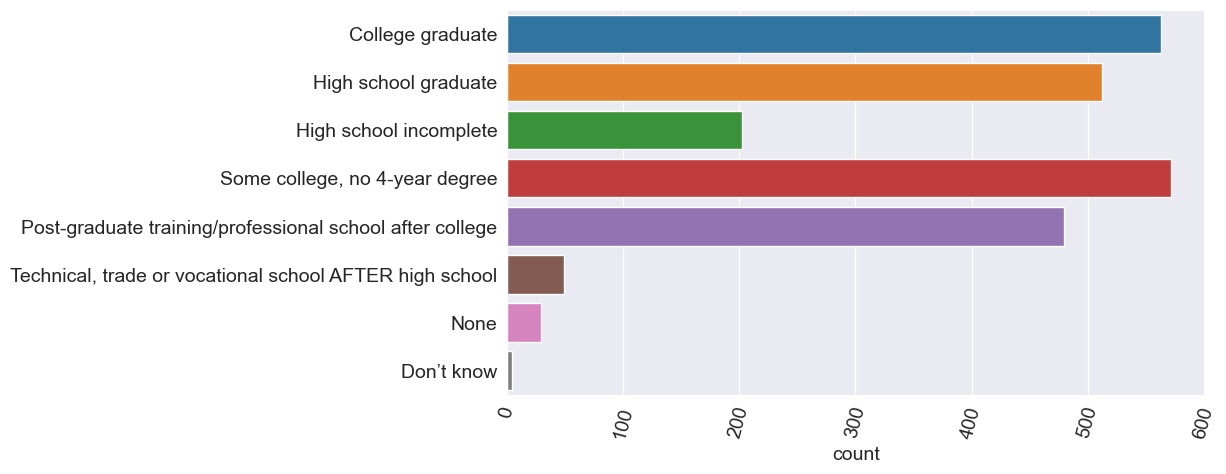

In [430]:
sns.countplot(y=df.education)
plt.xticks(rotation=75);
plt.ylabel(None);

It appears that most of the respondents have some sort of higher education (college, post college training, associate degree, ecc). Later we'll check more in depth respondents with lower education (HS, incomplete HS, none)

#### Studying demographic IV - Employement

In [431]:
df.employment.unique()

array(['Retired', 'FT', 'PT', 'SelfEmpl', 'Student', 'Other', 'NotEmpl',
       'Disabled'], dtype=object)

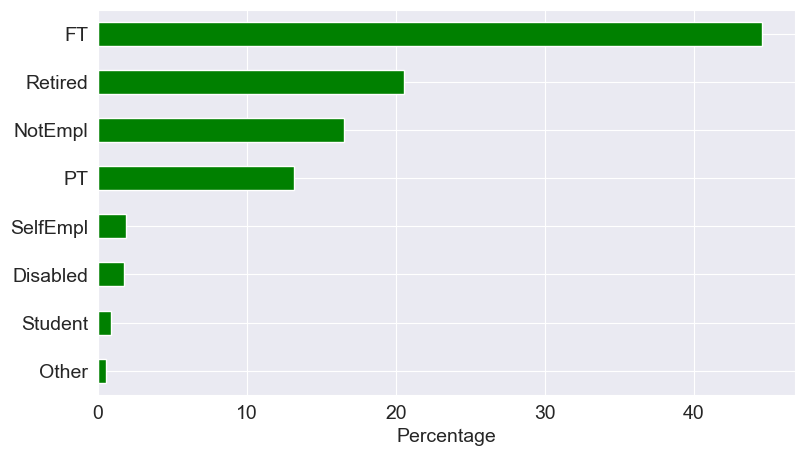

In [432]:
(df.employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.xlabel('Percentage');

Almost half of our respondants works full-time, while the other half either works PT or doesn't work at all.

#### Studying demographic V - Incomes

In [433]:
df.incomes.unique()

array([3, 1, 5, 2, 6, 8, 7, 4, 0], dtype=int64)

Let's remember our legend:

<code>
* Refused --> 0
* Less than $10,000 --> 1
* $10,000 to under $20,000 --> 2
* $20,000 to under $30,000 --> 3
* $30,000 to under $40,000 --> 4
* $40,000 to under $50,000 --> 5
* $50,000 to under $75,000 --> 6
* $75,000 to under $100,000 --> 7 
* $100,000 to under $150,000 --> 8 </code>

Let's remove those who refused to answer:

In [434]:
df = df[df.incomes != 0]
df.incomes.unique()

array([3, 1, 5, 2, 6, 8, 7, 4], dtype=int64)

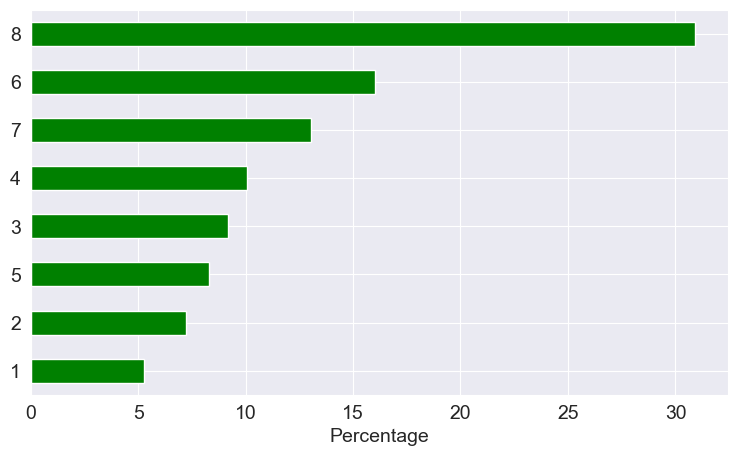

In [435]:
(df.incomes.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.xlabel('Percentage');

Around ~32% has an high income (100k-150k), the other ranges seems quite well distribuited.
Since we don't know respondants' countries, we can't actually say if this is the average income or not, but considering we're taking dollars ($) as currency, it could be US, where the average annual income is around 100k. 

## Asking and answering questions

#### Q1: Is there a difference between sex? Do females read more than males or viceversa?

In [436]:
female_readers_df = df[df['sex'] == "Female"]
male_readers_df = df[df['sex'] == "Male"]

In [437]:
female_readers_df.books_last_12mo.sum()

26041

In [438]:
male_readers_df.books_last_12mo.sum()

16191

<Axes: xlabel='sex', ylabel='books_last_12mo'>

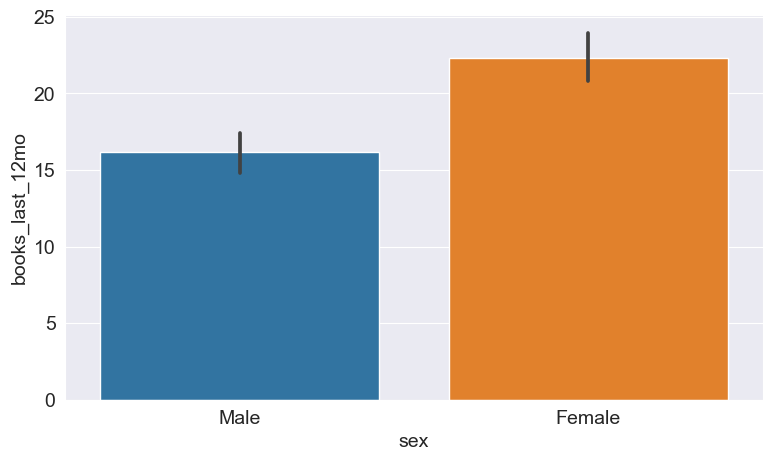

In [439]:
sns.barplot(y = 'books_last_12mo',
            x= 'sex',
            data = df)

Seems like female read a bit more than male. But we have to consider that, as we saw in our demographic analysis, we have more female than male in this dataframe.

#### Q2: What age (range) reads the most? And why (optional)

In [440]:
df_young = df[df.age < 20]
df_mid_adults = df[(df.age > 20) & (df.age < 40)]
df_old = df[(df.age > 40) & (df.age < 95)]

In [441]:
x = round(df_young['books_last_12mo'].mean(), 1)
y = round(df_mid_adults['books_last_12mo'].mean(), 1)
z = round(df_old['books_last_12mo'].mean(), 1)

print("Young people read an average of {} books per year".format(x))
print("Adults read an average of {} books per year".format(y))
print("Old people read an average of {} books per year".format(z))

Young people read an average of 17.5 books per year
Adults read an average of 17.4 books per year
Old people read an average of 21.2 books per year


Seems like that old people reads more than youngers and adults.

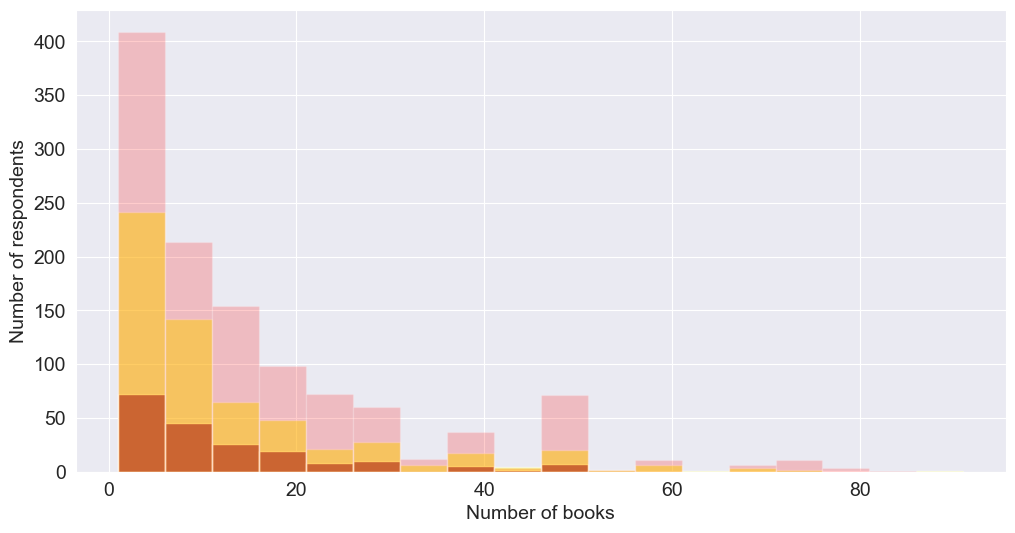

In [468]:
plt.figure(figsize=(12, 6))
plt.xlabel('Number of books')
plt.ylabel('Number of respondents')

plt.hist(df_young.books_last_12mo, bins=np.arange(1,95,5), color='purple', label='Young');
plt.hist(df_mid_adults.books_last_12mo, bins=np.arange(1,95,5), color='yellow', alpha=0.5);
plt.hist(df_old.books_last_12mo, bins=np.arange(1,95,5), color='red', alpha=0.2);

#### Q3: Among which category audiobooks are popular?

Switching Yes to 1 and No to 0, so we can do some calculations.

In [443]:
df = df.replace('Yes', '1')
df = df.replace('No', '0')

In [444]:
df.audiobook_last_12mo.unique()

array(['0', '1', 'Don’t know'], dtype=object)

Let's remove "Don't know"

In [445]:
df = df[df["audiobook_last_12mo"].str.contains("Don’t know") == False]

In [446]:
df.audiobook_last_12mo.astype(int)

0       0
1       1
2       1
3       0
4       1
       ..
2437    0
2438    0
2439    0
2440    0
2441    0
Name: audiobook_last_12mo, Length: 2165, dtype: int32

Let's select those who said "Yes" to audiobook in the last 12 months.

In [447]:
audiobook_lovers = df[df.audiobook_last_12mo == '1']

In [448]:
audiobook_lovers

,age,sex,race,education,employment,incomes,books_last_12mo,audiobook_last_12mo,purchased_borrowed
1,46,Male,Native American/American Indian,High school graduate,FT,1,97,1,Purchased
2,32,Male,Mixed race,High school graduate,FT,1,97,1,Borrowed
4,16,Female,Mixed race,High school incomplete,PT,2,97,1,Purchased
5,55,Female,Asian or Pacific Islander,"Some college, no 4-year degree",SelfEmpl,5,97,1,Purchased
49,65,Female,White,"Some college, no 4-year degree",PT,5,97,1,Purchased
...,...,...,...,...,...,...,...,...,...
2403,37,Male,White,College graduate,FT,6,1,1,Borrowed
2405,35,Male,White,"Some college, no 4-year degree",NotEmpl,1,1,1,Borrowed
2423,27,Female,White,"Some college, no 4-year degree",PT,6,1,1,Purchased
2429,23,Male,White,High school graduate,FT,2,1,1,Purchased


Let's see the average age

In [449]:
audiobook_lovers.age.mean()

46.85286103542234

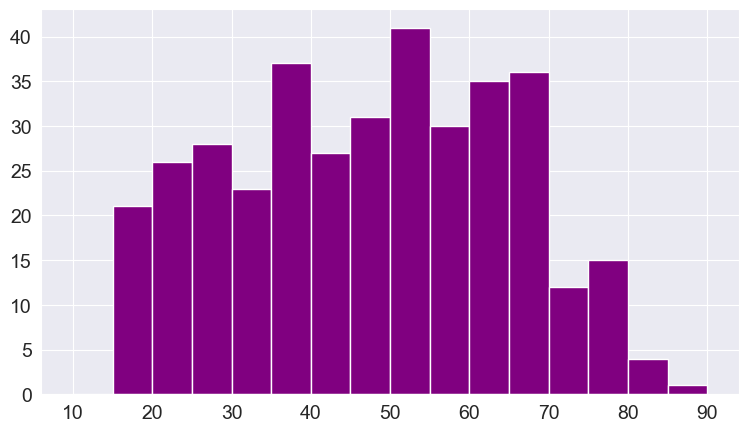

In [450]:
plt.hist(x = audiobook_lovers.age, bins=np.arange(10,95,5), color='purple');

Let's see between which sex audiobooks are most popular:

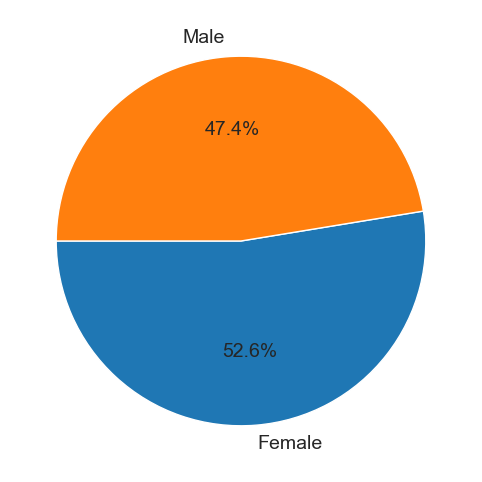

In [451]:
audiobook_sex_counts = audiobook_lovers.sex.value_counts()

plt.figure(figsize=(12,6))
plt.pie(audiobook_sex_counts, labels=audiobook_sex_counts.index, autopct='%1.1f%%', startangle=180);

I didn't expect audiobooks to be popular around 45/50 year old people, I thought it could be more appealing to young people.

#### Q4: Among the most avid readers (50+ books) which percentage actually buy books?

In [452]:
avid_readers = df[df.books_last_12mo > 50]

In [453]:
avid_readers

,age,sex,race,education,employment,incomes,books_last_12mo,audiobook_last_12mo,purchased_borrowed
0,66,Male,0,College graduate,Retired,3,97,0,Purchased
1,46,Male,Native American/American Indian,High school graduate,FT,1,97,1,Purchased
2,32,Male,Mixed race,High school graduate,FT,1,97,1,Borrowed
3,27,Male,Mixed race,High school graduate,FT,5,97,0,Borrowed
4,16,Female,Mixed race,High school incomplete,PT,2,97,1,Purchased
...,...,...,...,...,...,...,...,...,...
194,21,Female,White,"Some college, no 4-year degree",NotEmpl,8,60,0,Purchased
197,66,Female,White,High school graduate,Retired,5,55,0,Purchased
198,47,Female,White,High school graduate,PT,3,54,0,Borrowed
200,29,Female,White,Post-graduate training/professional school aft...,FT,7,52,0,Purchased


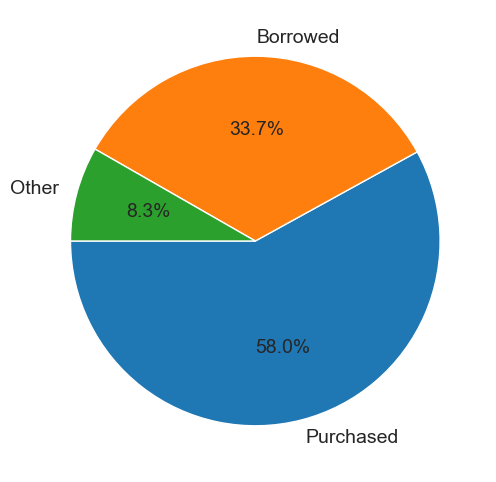

In [454]:
buyer_count = avid_readers.purchased_borrowed.value_counts()

plt.figure(figsize=(12,6))
plt.pie(buyer_count, labels=buyer_count.index, autopct='%1.1f%%', startangle=180);

Very good! So those who love to read books also love to have them materially.

#### Q5  Are books a luxury among those who earn the minimum?

Let's see among those who don't earn a lot, how many of them actually buy books.

In [461]:
low_incomes = [1, 2, 3]
poor = df[df.incomes.isin(low_incomes)]

In [462]:
poor

,age,sex,race,education,employment,incomes,books_last_12mo,audiobook_last_12mo,purchased_borrowed
0,66,Male,0,College graduate,Retired,3,97,0,Purchased
1,46,Male,Native American/American Indian,High school graduate,FT,1,97,1,Purchased
2,32,Male,Mixed race,High school graduate,FT,1,97,1,Borrowed
4,16,Female,Mixed race,High school incomplete,PT,2,97,1,Purchased
9,29,Female,Black or African-American,High school graduate,PT,1,97,0,Borrowed
...,...,...,...,...,...,...,...,...,...
2426,25,Female,White,"Some college, no 4-year degree",PT,2,1,0,Purchased
2429,23,Male,White,High school graduate,FT,2,1,1,Purchased
2436,17,Female,White,High school graduate,NotEmpl,3,1,0,Borrowed
2438,16,Female,White,High school incomplete,NotEmpl,1,1,0,Borrowed


Let's check what's the common education for those people:

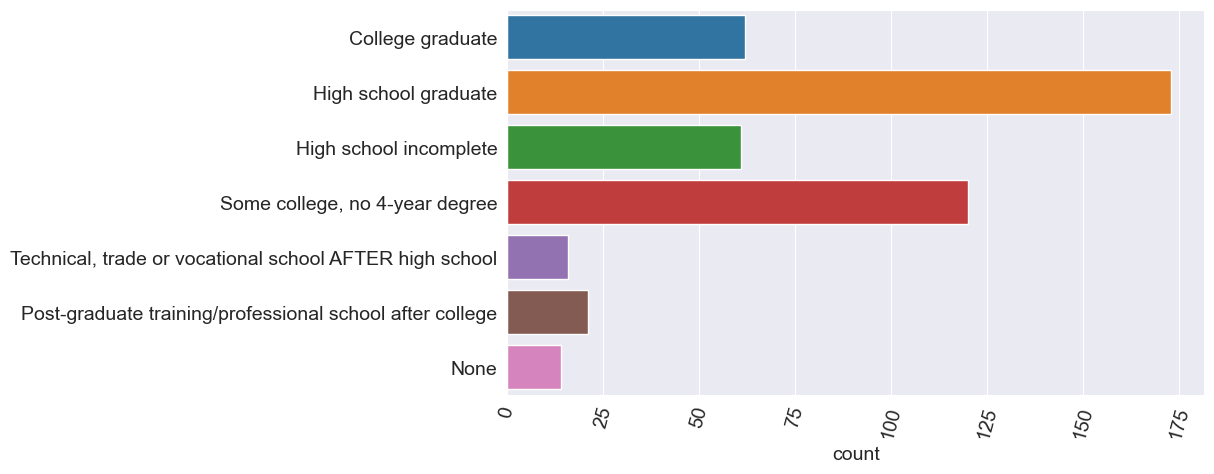

In [463]:
sns.countplot(y=poor.education)
plt.xticks(rotation=75);
plt.ylabel(None);

Also let's check what's the average number of books read per year:

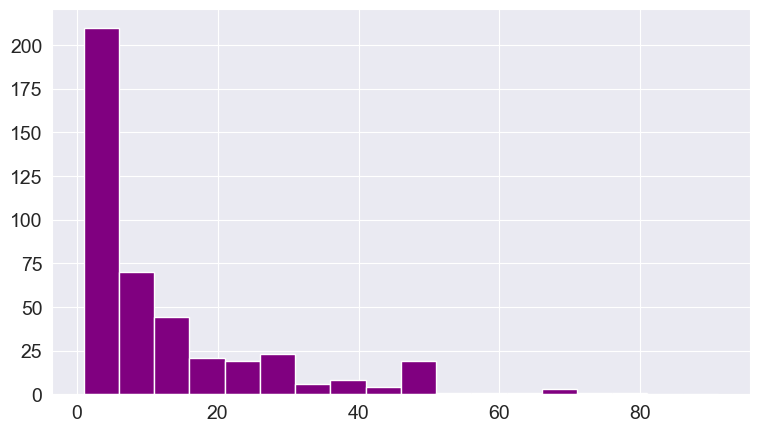

In [467]:
plt.hist(x = poor.books_last_12mo, bins=np.arange(1,95,5), color='purple');

Even among those who doesn't earn a lot, there's still a good chunck of people that decides to read books. Let's see how many of them buy books:

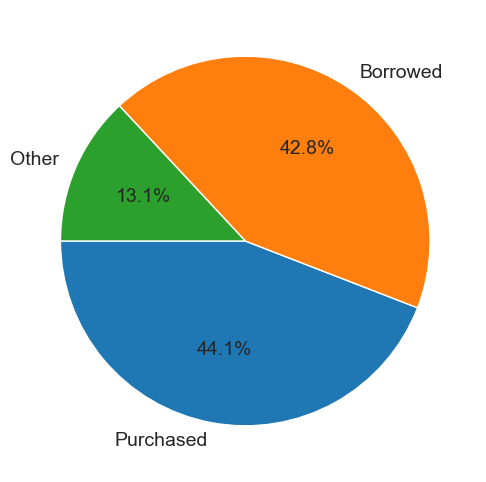

In [469]:
poor_buyer_count = poor.purchased_borrowed.value_counts()

plt.figure(figsize=(12,6))
plt.pie(poor_buyer_count, labels=poor_buyer_count.index, autopct='%1.1f%%', startangle=180);

Almost a tie between bought and borrowed books. Let's check the lowest income available:

In [471]:
poorer = df[df.incomes == 1]

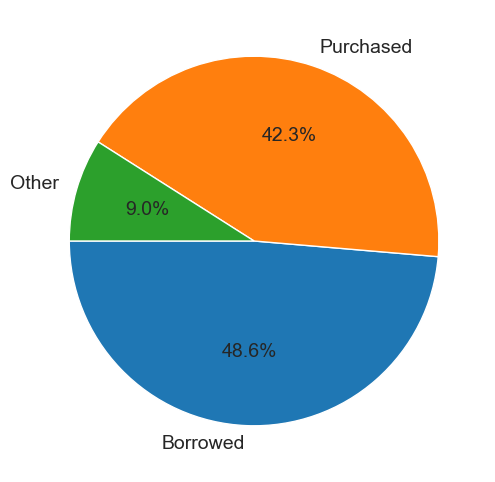

In [472]:
poorer_buyer_count = poorer.purchased_borrowed.value_counts()

plt.figure(figsize=(12,6))
plt.pie(poorer_buyer_count, labels=poorer_buyer_count.index, autopct='%1.1f%%', startangle=180);

Lovely to see that even in the lowest income range, there's people out there that decide to BUY books!

# Conclusion

I've been quite surprised to discover that audiobooks appeal more 45/50 years old people than young people. I do find them quite innovative and super handy. But maybe since they're so handy, they're good for very busy people (workers, managers, parents), thanks to the fact that they can be heard anywhere and in any moment, they can be a blessing for people that doesn't have time to read.

I am also very glad to have found out that even among people that doesn't earn a lot, reading is not a luxury: there's always a bit of money to spend in something as beautiful as a book! This is a lovely discover.